### Importations

In [132]:
import numpy as np
from itertools import product
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from bokeh.layouts import column
from bokeh.plotting import figure, show
from bokeh.sampledata.autompg import autompg
from bokeh.transform import jitter
from bokeh.io import output_notebook
from bokeh.models import HoverTool

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [133]:
## Importing Skyrim Weapons dataset  :  https://www.kaggle.com/datasets/elmartini/skyrim-weapons-dataset
df = pd.read_csv('Skyrim_Weapons.csv')
df.head()

,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed
0,Ancient Nord Battle Axe,18,22.0,28,Steel Ingot,Steel,Battleaxe,Two-Handed,NaN
1,Daedric Battleaxe,25,27.0,2750,Ebony Ingot,Daedric,Battleaxe,Two-Handed,NaN
2,Dragonbone Battleaxe,26,30.0,3000,Dragon Bone,Dragon,Battleaxe,Two-Handed,NaN
3,Drainblood Battleaxe,21,5.0,266,NaN,-,Battleaxe,Two-Handed,NaN
4,Dwarven Battleaxe,20,23.0,300,Dwarven Metal Ingot,Dwarven,Battleaxe,Two-Handed,NaN


In [134]:
## Size of the dataset and Type of each column in the dataset
print("Size of the dataset", df.shape, "\n")
print("Type of each column\n", df.dtypes)

Size of the dataset (293, 9) 

Type of each column
 Name         object
Damage        int64
Weight      float64
Gold          int64
Upgrade      object
Perk         object
Type         object
Category     object
Speed       float64
dtype: object


In [135]:
miss_val = df.isnull().sum().sum()
print ("Total number of missing values :", miss_val,"\n")
print("Number of missing values for each column\n", df.isnull().sum(),"\n")
print ("Percentage of missing values in each column\n", df.isnull().mean()*100,"\n")

Total number of missing values : 398 

Number of missing values for each column
 Name          0
Damage        0
Weight        0
Gold          0
Upgrade      61
Perk         83
Type          0
Category      0
Speed       254
dtype: int64 

Percentage of missing values in each column
 Name         0.000000
Damage       0.000000
Weight       0.000000
Gold         0.000000
Upgrade     20.819113
Perk        28.327645
Type         0.000000
Category     0.000000
Speed       86.689420
dtype: float64 



In [136]:
## Statistic description of the quantitative descriptors
print(df.describe())

           Damage      Weight         Gold      Speed
count  293.000000  293.000000   293.000000  39.000000
mean    13.017065   12.590444   521.300341   0.765923
std      5.692736    7.649840   732.009566   0.165776
min      0.000000    0.000000     0.000000   0.500000
25%      9.000000    9.000000    45.000000   0.625000
50%     12.000000   12.000000   188.000000   0.750000
75%     17.000000   17.000000   727.000000   0.875000
max     28.000000   36.000000  4275.000000   1.000000


In [137]:
## Number of duplicates in the dataset
print("Number of duplicates in the dataset", df.duplicated().sum())
print(df.count().sum())

Number of duplicates in the dataset 0
2239


### Data Cleaning

In [138]:
## I chose to remove the speed column as more than 85% of this column is missing
df.drop(['Speed'], axis=1, inplace=True)
df.head()

,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category
0,Ancient Nord Battle Axe,18,22.0,28,Steel Ingot,Steel,Battleaxe,Two-Handed
1,Daedric Battleaxe,25,27.0,2750,Ebony Ingot,Daedric,Battleaxe,Two-Handed
2,Dragonbone Battleaxe,26,30.0,3000,Dragon Bone,Dragon,Battleaxe,Two-Handed
3,Drainblood Battleaxe,21,5.0,266,NaN,-,Battleaxe,Two-Handed
4,Dwarven Battleaxe,20,23.0,300,Dwarven Metal Ingot,Dwarven,Battleaxe,Two-Handed


In [139]:
## Which reduced the number of missing value to :
miss_val2 = df.isnull().sum().sum()
print ("Total number of missing values :", miss_val2,"\n")

Total number of missing values : 144 



In [140]:
## Number of unique value in each column
df.nunique()

Name        285
Damage       28
Weight       39
Gold        185
Upgrade      18
Perk         11
Type         12
Category      3
dtype: int64

In [141]:
# dfdashes = df.filter(items=["Name","Perk"])
dfdashes = df[(df.Perk == "–") & (df.Perk == "-")]
dfdashes

,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category


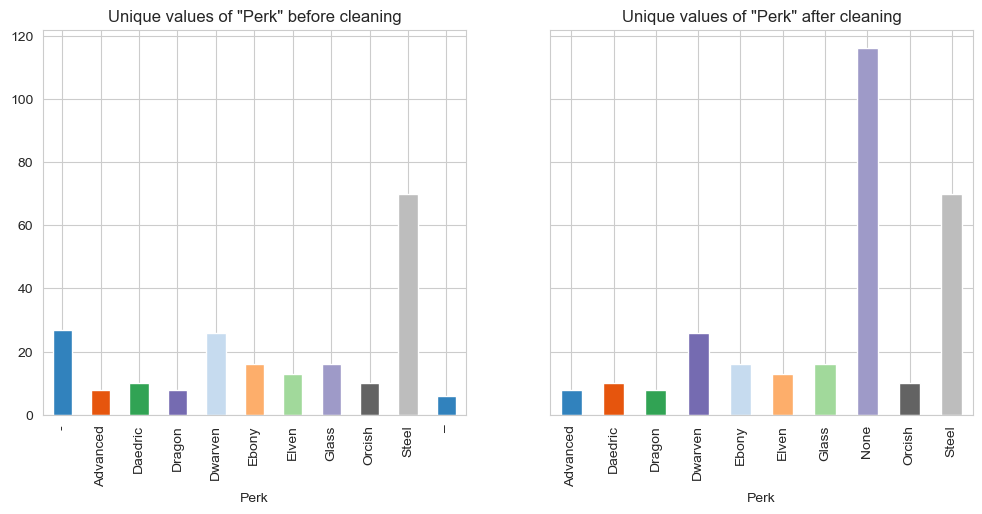

In [142]:
## Group by unique values for each qualitative column and visualize it in bar graph to see outliers or wrong values
## Noticed that the column 'Perk' contains values such as "–", "-" or NaNs.
dfunique = df.groupby(['Perk']).count()["Name"]

## Replacing the non defined values by the value "None"
df.replace("–", "None", inplace = True)
df.replace("-", "None", inplace = True)
df.replace(np.nan, "None", inplace = True)
cmap = plt.colormaps["tab20c"]
dfunique2 = df.groupby(['Perk']).count()["Name"]

sns.set_style("whitegrid");
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True);
dfunique.plot.bar(ax = axes[0], color=cmap([0,4,8,12,3,6,10,13,16,18,0]));
axes[0].set_title('Unique values of "Perk" before cleaning');
dfunique2.plot.bar(ax = axes[1], color=cmap([0,4,8,12,3,6,10,13,16,18]));
axes[1].set_title('Unique values of "Perk" after cleaning');



In [143]:
miss_val2 = df.isnull().sum().sum()
print ("Total number of missing values :", miss_val2,"\n")

Total number of missing values : 0 



####  We now have 0 missing values.

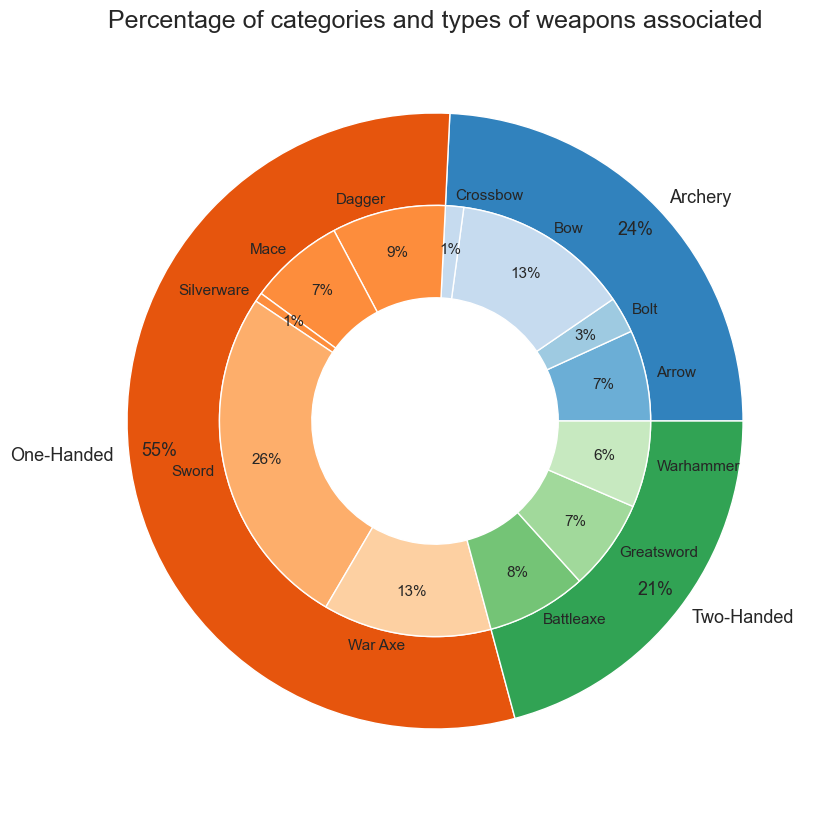

In [144]:
#Group by category and show the type of weapons associated. Qualitative-qualitative chart.
cattypeunique   = df.groupby(["Category","Type"]).count()["Name"]
cattypeunvalues = cattypeunique.values
catsum = cattypeunique.groupby(level=["Category"], sort=False).sum()
typsum = cattypeunique.groupby(level=["Type"], sort=False).sum()

fig, ax = plt.subplots(figsize=(10,10))

size = 0.3
vals = cattypeunique

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 3, 3, 5, 5, 5, 6, 7, 9, 10, 11])

# Labels defining for both layers of the pie
labels_inner = typsum.index
labels_outer = catsum.index

ax.pie(catsum, 
       radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), 
       labels=labels_outer, labeldistance =1.05, textprops={'fontsize': 13}, 
       autopct='%1.0f%%', pctdistance=0.9)

ax.pie(typsum.values, 
       radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'), 
       labels=labels_inner, labeldistance =1.05, textprops={'fontsize': 11}, 
       autopct='%1.0f%%', pctdistance=0.8)


ax.set(aspect="equal")
plt.title('Percentage of categories and types of weapons associated', fontsize = 18)
plt.show();

#### More than half of the weapons are one-handed, the rest is split between two-handed and archery. Moreover, Bows War Axes and Swords a more represented than the other types of weapons.

#### The less represented weapons are the Silverware, crossbows and also bolts.

In [145]:
df.loc[df["Type"] == "Silverware"]

,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category
181,Fork,1,0.5,5,None,None,Silverware,One-Handed
182,Knife,2,0.5,1,None,None,Silverware,One-Handed


#### The silverware are only the fork and the knife from the cutlery findable in any houses.

In [146]:
df.loc[df["Type"] == "Crossbow"]

,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category
281,Crossbow,19,14.0,120,Steel Ingot,None,Crossbow,Archery
282,Dwarven Crossbow,22,20.0,350,Dwarven metal ingot,None,Crossbow,Archery
283,Enhanced Crossbow,19,15.0,200,Steel Ingot,None,Crossbow,Archery
284,Enhanced Dwarven Crossbow,22,21.0,550,Dwarven metal ingot,None,Crossbow,Archery


#### There are only 4 crossbows, they can be upgraded but don't have access to any perk. This type of weapon is exclusive to the dawnguard DLC.


In [147]:
df.loc[df["Type"] == "Bolt"]

,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category
285,Steel Bolt,10,0.0,1,None,None,Bolt,Archery
286,Dwarven Bolt,14,0.0,3,None,None,Bolt,Archery
287,Exploding Steel Bolt of Fire,10,0.0,5,None,None,Bolt,Archery
288,Exploding Steel Bolt of Ice,10,0.0,5,None,None,Bolt,Archery
289,Exploding Steel Bolt of Shock,10,0.0,5,None,None,Bolt,Archery
290,Exploding Dwarven Bolt of Fire,14,0.0,15,None,None,Bolt,Archery
291,Exploding Dwarven Bolt of Ice,14,0.0,15,None,None,Bolt,Archery
292,Exploding Dwarven Bolt of Shock,14,0.0,15,None,None,Bolt,Archery


#### There are 8 Bolts which are just arrows but for crossbows hence, they are also exclusive to the Dawnguard DLC. Arrows and bolt can't be upgraded and don't have any perks. However Bethesda released Bolts with already included effects such as Exploding Fire, Ice or Shock. 

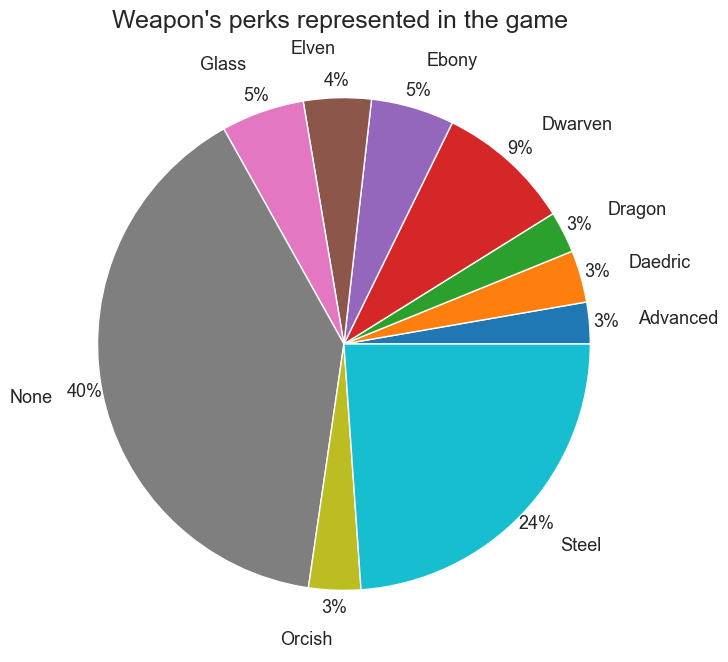

In [148]:
perkuniquelabels = df.groupby(["Perk"]).count()["Name"].index
perkuniquedata = df.groupby(["Perk"]).count()["Name"].values

plt.figure(figsize=(8,8))
plt.pie(perkuniquedata, labels=perkuniquelabels, autopct='%1.0f%%', pctdistance=1.07, labeldistance=1.2, textprops={"fontsize":13});
plt.title("Weapon's perks represented in the game ", fontsize=18);

#### Most of the weapons don't have a perk or are steel weapons.

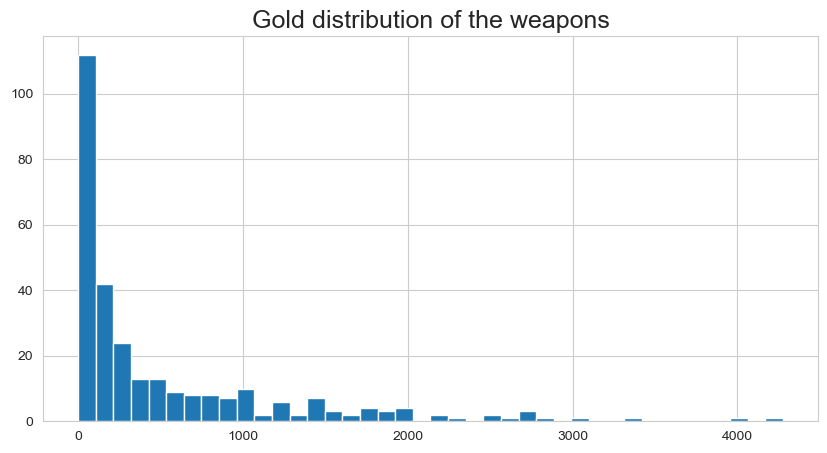

In [149]:
# Histogram of the golds
n_bins = 40
# logbins = np.logspace(np.log10(n_bins[0]),np.log10(n_bins[-1]),len(n_bins))
goldhist = df["Gold"]

plt.figure(figsize = (10,5))
plt.hist(goldhist, bins=n_bins, log = False);
plt.title("Gold distribution of the weapons", fontsize = 18);

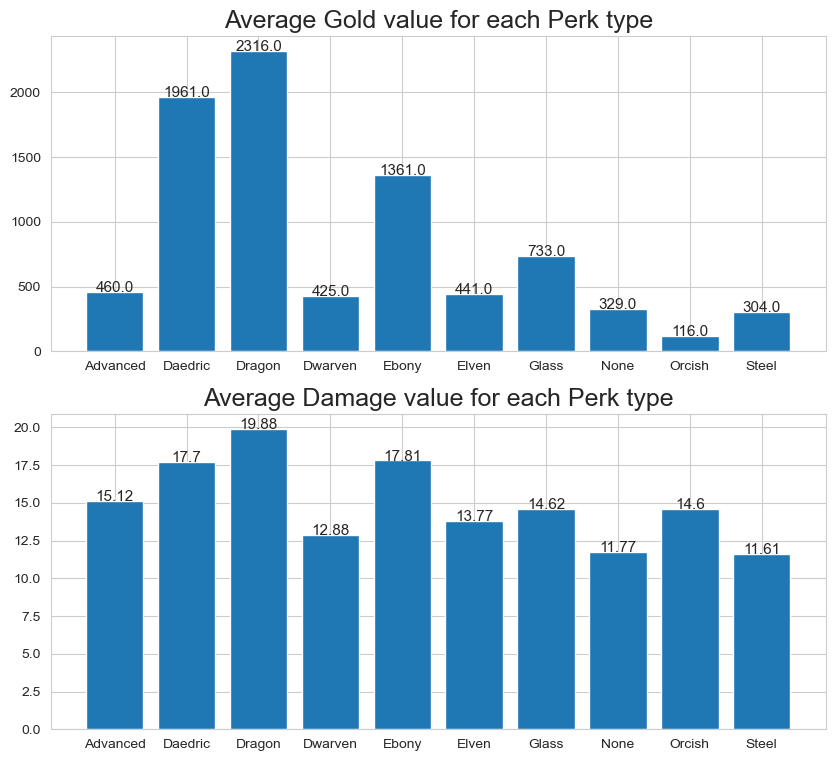

In [150]:
# Bar graphs of the average gold of each perk
def addlabels(ax,x,y):
    for i in range(len(x)):
        ax.text(i, y[i], y[i], ha = 'center').set_fontsize(11)


avgolds = df.groupby("Perk").mean("Gold")
avgolds.drop(["Weight"], axis = 1, inplace = True)

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10,9))
ax1.bar(x=avgolds.index, height = avgolds["Gold"])
ax1.set_title("Average Gold value for each Perk type", fontdict ={"fontsize" : 18});

ax2.bar(x=avgolds.index, height = avgolds["Damage"])
ax2.set_title("Average Damage value for each Perk type", fontdict ={"fontsize" : 18});

addlabels(ax1,avgolds.index, round(avgolds["Gold"]))
addlabels(ax2,avgolds.index, round(avgolds["Damage"],2))


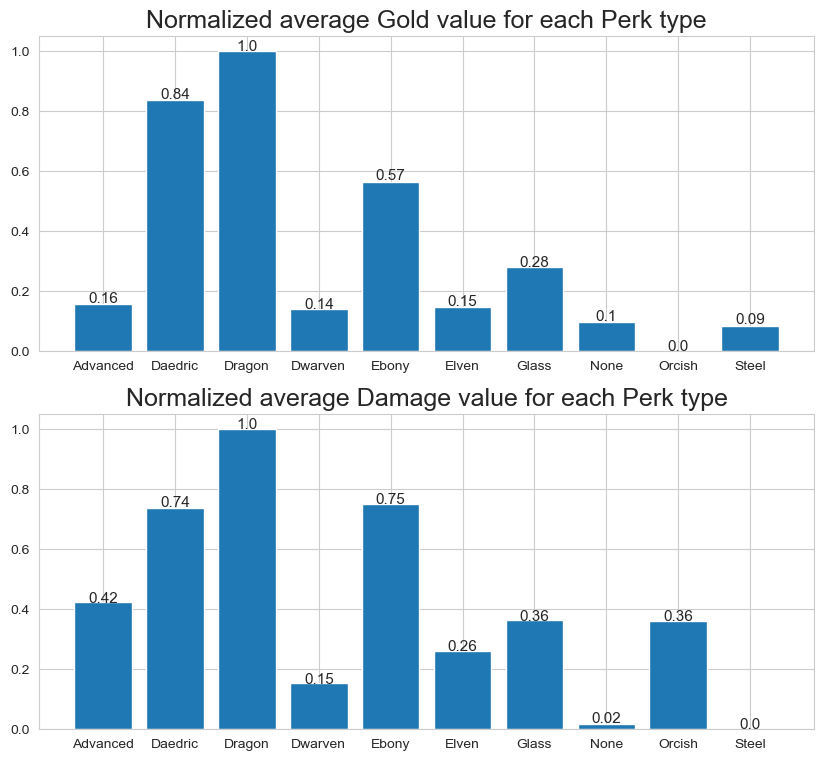

In [151]:
scaler = MinMaxScaler()
 
df_norm=pd.DataFrame(scaler.fit_transform(avgolds),
            columns=avgolds.columns, index=avgolds.index) 

fig2, (ax1, ax2) = plt.subplots(2,1, figsize = (10,9))
ax1.bar(x=df_norm.index, height = df_norm["Gold"])
ax1.set_title("Normalized average Gold value for each Perk type", fontdict ={"fontsize" : 18});

ax2.bar(x=df_norm.index, height = df_norm["Damage"])
ax2.set_title("Normalized average Damage value for each Perk type", fontdict ={"fontsize" : 18});

addlabels(ax1,df_norm.index, round(df_norm["Gold"],2))
addlabels(ax2,df_norm.index, round(df_norm["Damage"],2))


In [152]:
output_notebook()

Loading BokehJS ...

In [153]:
p1 = figure(width=700, height=500, title="Base damage regarding the gold value")
p1.xaxis.ticker = df["Damage"]
p1.scatter(x="Damage", y="Gold", size=9, alpha=0.4, source=df)
hover = HoverTool(tooltips=[("Name","@Name"),('Damage', '@Damage'),("Gold","@Gold")])
p1.add_tools(hover) 
show(p1);

In [154]:
# Compter les occurences de chaque couple Type-Perk et trouver les occurences = 0.

# Il me faut un df de tous les types et perks.
dftypeperk = df[["Perk","Type"]]
dftypeperk["Count"]=np.ones(dftypeperk.shape[0])
df2 = dftypeperk.groupby(["Type", "Perk"]).sum()

# Il me faut une liste des valeurs uniques de types et une autre de perks.

typelabels = df.groupby(["Type"]).count()["Name"].index
perklabels = df.groupby(["Perk"]).count()["Name"].index

comb = pd.DataFrame(list(product(typelabels, perklabels)), columns=['Types', 'Perks'])

# Avec un double for parcourir le df types+perks et, pour chaque ligne comparer avec toutes les combinaisons de perks-types possibles.
comb["Count"]=np.zeros(comb.shape[0])

for types in typelabels:
    for perks in perklabels:
        
        rowIndex = comb[(comb["Types"] == types) & (comb["Perks"] == perks)].index
        if ((df['Type'] == types) & (df['Perk'] == perks)).any() == True:
            
# Dans un df contenant toutes les combinaisons possibles, implémenter la valeur de la combinaison trouvée.
            comb["Count"].loc[rowIndex]+=1

# Trouver les valeurs de combinaisons du df final contenant 0.
comb[comb["Count"]==0]


,Types,Perks,Count
0,Arrow,Advanced,0.0
1,Arrow,Daedric,0.0
2,Arrow,Dragon,0.0
3,Arrow,Dwarven,0.0
4,Arrow,Ebony,0.0
5,Arrow,Elven,0.0
6,Arrow,Glass,0.0
8,Arrow,Orcish,0.0
9,Arrow,Steel,0.0
20,Bolt,Advanced,0.0


#### Observing all the couples type-perk we see that only Arrows, Bolts, Crossbows and Silverware are not represented with perks. Arrow and bolts are ammunitions and silverware are only forks and knives (not daggers). 
#

## Conclusion
### Regarding all the data analyzed it would be a good idea to give access to more crossbows with perks, also giving a Daedric or Dragon Crossbows at the end of an important quest.